In [2]:
#importandoa as biblioetcas usadas para a preparação dos dados e predição
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#importando o csv
df = pd.read_csv("nba.games.stats.csv")
df.describe

<bound method NDFrame.describe of       Unnamed: 0 Team  Game        Date  Home Opponent WINorLOSS  TeamPoints  \
0              1  ATL     1  2014-10-29  Away      TOR         L         102   
1              2  ATL     2  2014-11-01  Home      IND         W         102   
2              3  ATL     3  2014-11-05  Away      SAS         L          92   
3              4  ATL     4  2014-11-07  Away      CHO         L         119   
4              5  ATL     5  2014-11-08  Home      NYK         W         103   
...          ...  ...   ...         ...   ...      ...       ...         ...   
9835       78119  WAS    78  2018-04-03  Away      HOU         L         104   
9836       79119  WAS    79  2018-04-05  Away      CLE         L         115   
9837       80119  WAS    80  2018-04-06  Home      ATL         L          97   
9838       81124  WAS    81  2018-04-10  Home      BOS         W         113   
9839       82119  WAS    82  2018-04-11  Away      ORL         L          92   

     

In [3]:
df.drop(['Unnamed: 0', 'Team', 'Game', 'Date', 'Home', 'Opponent'], axis=1, inplace=True)
df.head()

,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,FreeThrows,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,L,102,109,40,80,0.500,13,22,0.591,9,...,27,33,0.818,16,48,26,13,9,9,22
1,W,102,92,35,69,0.507,7,20,0.350,25,...,18,21,0.857,11,44,25,5,5,18,26
2,L,92,94,38,92,0.413,8,25,0.320,8,...,27,38,0.711,11,50,25,7,9,19,15
3,L,119,122,43,93,0.462,13,33,0.394,20,...,20,27,0.741,11,51,31,6,7,19,30
4,W,103,96,33,81,0.407,9,22,0.409,28,...,8,11,0.727,13,44,26,2,6,15,29


In [4]:
#Transformando os dados categóricos de  WINorLOSS para numeros
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['WINorLOSS'])
df['WINorLOSS'] = le.transform(df['WINorLOSS'])

In [5]:
#importando para separar dos dados de teste e de treino
from sklearn.model_selection import train_test_split

In [6]:
#separando a base de dados
x = df.drop('WINorLOSS',axis=1)
y = df['WINorLOSS']

In [7]:
#separando os dados de treino de teste sendo 40% para teste e 60% para treino e escolhedo o um random 
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size=0.3,random_state=101)
aux = y_teste.reset_index()
aux.drop('index',axis=1,inplace=True)

In [8]:
#importando o algoritmo de arvore de decisão
from sklearn.svm import SVC
svc = SVC(gamma='auto')

In [9]:
svc.fit(x_treino,y_treino)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
predicao = svc.predict(x_teste)

Text(0, 0.5, 'Y valor predito')

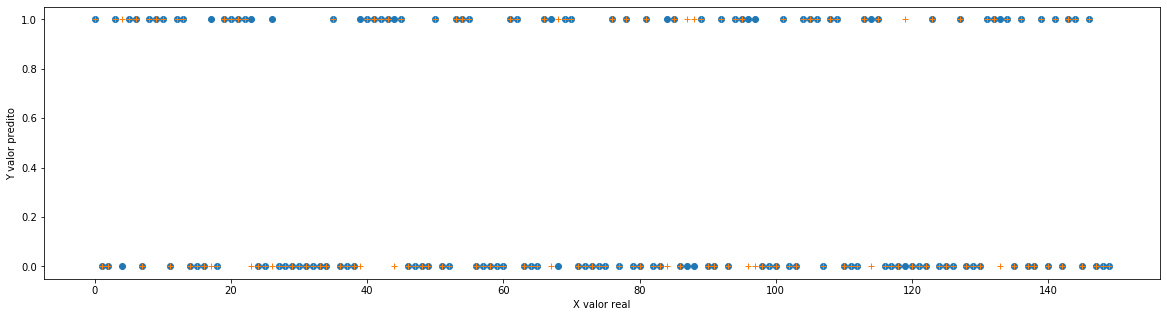

In [11]:
plt.figure(figsize=(20,5))
plt.plot(aux[:150], 'o')
plt.plot(predicao[:150], '+')
plt.xlabel('X valor real')
plt.ylabel('Y valor predito')

In [12]:
from sklearn import metrics
#MAE é o mais fácil de entender, porque é o erro médio.
#MSE é mais popular que o MAE, porque a MSE "puniria" erros maiores, o que tende a ser útil no mundo real.
#RMSE é ainda mais popular do que MSE, porque o RMSE é interpretável nas unidades "y".
print('MAE:', metrics.mean_absolute_error(y_teste, predicao))
print('MSE:', metrics.mean_squared_error(y_teste, predicao))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste, predicao)))

MAE: 0.09959349593495935
MSE: 0.09959349593495935
RMSE: 0.3155843721336013


In [13]:
print('Variance score: %.2f' % svc.score(x_teste,aux))

Variance score: 0.90


In [14]:
#fazendo a predicao usando cross-valodation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svc,x,y, cv=10)

In [15]:
print('Variance Cros-Validation rscore: %.2f' % max(scores))

Variance Cros-Validation rscore: 0.92


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_teste,predicao))

              precision    recall  f1-score   support

           0       0.87      0.95      0.90      1476
           1       0.94      0.86      0.90      1476

    accuracy                           0.90      2952
   macro avg       0.90      0.90      0.90      2952
weighted avg       0.90      0.90      0.90      2952



In [17]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_teste,predicao))

[[1396   80]
 [ 214 1262]]


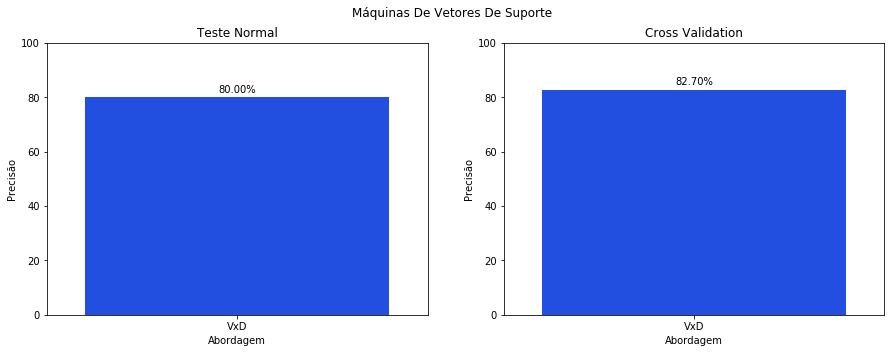

In [3]:
plt.figure(figsize=(15,5))
plt.suptitle('Máquinas De Vetores De Suporte')

plt.subplot(1, 2, 1)
plt.title("Teste Normal")

graph = sns.barplot(x=['VxD'], y=[80],palette='bright')
for p in graph.patches:
    graph.annotate(format(p.get_height(), '.2f') + "%", (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
plt.xlabel("Abordagem")
plt.ylabel("Precisão")
plt.ylim([0, 100])

plt.subplot(1, 2, 2)
plt.title("Cross Validation")
graph2 = sns.barplot(x=['VxD'], y=[82.7],palette='bright')
for p in graph2.patches:
    graph2.annotate(format(p.get_height(), '.2f') + "%", (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 8), textcoords = 'offset points')
plt.xlabel("Abordagem")
plt.ylabel("Precisão")
plt.ylim([0, 100])
plt.savefig('img/SVM.png')